# Regression on matched data after draft feedback

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%config InlineBackend.figure_format='retina'

In [2]:
# load data
matched_data = pd.read_csv("https://raw.githubusercontent.com/MIDS-at-Duke/uds-2023-team-1/main/"+
                           "30_intermediate_files/matched_data_0423.csv?token=GHSAT0AAAAAAB5IWVS57CZNWGSWI5NVTYX4ZCF5BKA")

In [3]:
matched_data.head()

,Unnamed: 0.1,Unnamed: 0,startdate,recordeddate,responseid,age,sex_birth,gender_male,gender_female,gender_transm,...,week-year,state,new_case,state_new,2020,cases_per_10k,is_online,weights,match_group_size,match_group
0,3,4,2022-04-21 17:14:42,2022-05-03 09:56:15,R_3ELrwNOuqQ7bzmP,2,1.0,0.0,1.0,0.0,...,18-2022,CA,53178.0,California,39501653.0,1,1.0,1.000000,4.0,10383.0
1,4,5,2022-04-11 12:35:38,2022-04-11 12:59:31,R_72I28iy8iqGtOnL,2,2.0,1.0,0.0,0.0,...,15-2022,CA,25540.0,California,39501653.0,0,0.0,1.110993,15.0,16059.0
2,5,10,2022-04-15 13:40:00,2022-04-15 16:36:31,R_1qdE55ZSFYCZrfT,1,1.0,0.0,1.0,0.0,...,15-2022,CA,25540.0,California,39501653.0,0,1.0,1.000000,8.0,14005.0
3,17,30,2022-04-15 13:57:00,2022-04-18 01:49:06,R_3CKuFuUtPmHgA4A,0,1.0,0.0,1.0,0.0,...,16-2022,CA,37047.0,California,39501653.0,1,0.0,11.427351,10.0,11263.0
4,18,32,2022-04-22 04:53:48,2022-04-22 05:31:01,R_8p7tjz4GhEAmh5T,0,1.0,0.0,1.0,0.0,...,16-2022,CA,37047.0,California,39501653.0,1,1.0,1.000000,20.0,14593.0


In [4]:
matched_data.shape

(36944, 94)

In [5]:
#check the number of enroll
matched_data.enroll.value_counts()

1.0    34620
2.0     2324
Name: enroll, dtype: int64

In [6]:
matched_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'startdate', 'recordeddate', 'responseid',
       'age', 'sex_birth', 'gender_male', 'gender_female', 'gender_transm',
       'gender_transf', 'sexual_other', 'gender_nonbin', 'gender_selfid',
       'sexual_h', 'sexual_l', 'sexual_g', 'sexual_bi', 'sexual_queer',
       'sexual_quest', 'sexual_asexual', 'sexual_pan', 'race_black',
       'race_ainaan', 'race_asian', 'race_his', 'race_pi', 'race_mides',
       'race_white', 'race_other', 'international', 'educ_par1', 'educ_par2',
       'scholarship_status_1', 'children_dep', 'hours_work_paid', 'transfer',
       'yr_sch', 'enroll', 'persist', 'disab_1', 'disab_2',
       'positive_mental_health', 'risk_of_depression', 'anxiety', 'timestud',
       'sui_idea', 'lone_isolated', 'abuse_life', 'assault_emo', 'alc_any',
       'sub_cig', 'sub_any', 'exerc', 'sleep_wknight', 'dx_any', 'knowwher',
       'meds_any', 'degree_ass', 'degree_bach', 'degree_ma', 'degree_jd',
       'degree_md', 'degree_phd', '

In [7]:
matched_data['anxiety'].value_counts()

0.0     4143
2.0     3241
3.0     3158
4.0     3036
5.0     2968
1.0     2790
6.0     2672
7.0     2668
8.0     1608
9.0     1487
10.0    1304
11.0    1201
12.0    1126
14.0    1017
13.0     999
15.0     714
16.0     596
21.0     592
17.0     508
18.0     447
19.0     394
20.0     275
Name: anxiety, dtype: int64

In [8]:
matched_data['age'].value_counts()

1    19283
0    10776
2     6885
Name: age, dtype: int64

In [9]:
matched_data['cases_per_10k'].value_counts()

1    17841
0    10084
2     9019
Name: cases_per_10k, dtype: int64

In [10]:
# put all the columns into a list
cols = matched_data.columns.tolist()
cols = cols[5:]
cols

['age',
 'sex_birth',
 'gender_male',
 'gender_female',
 'gender_transm',
 'gender_transf',
 'sexual_other',
 'gender_nonbin',
 'gender_selfid',
 'sexual_h',
 'sexual_l',
 'sexual_g',
 'sexual_bi',
 'sexual_queer',
 'sexual_quest',
 'sexual_asexual',
 'sexual_pan',
 'race_black',
 'race_ainaan',
 'race_asian',
 'race_his',
 'race_pi',
 'race_mides',
 'race_white',
 'race_other',
 'international',
 'educ_par1',
 'educ_par2',
 'scholarship_status_1',
 'children_dep',
 'hours_work_paid',
 'transfer',
 'yr_sch',
 'enroll',
 'persist',
 'disab_1',
 'disab_2',
 'positive_mental_health',
 'risk_of_depression',
 'anxiety',
 'timestud',
 'sui_idea',
 'lone_isolated',
 'abuse_life',
 'assault_emo',
 'alc_any',
 'sub_cig',
 'sub_any',
 'exerc',
 'sleep_wknight',
 'dx_any',
 'knowwher',
 'meds_any',
 'degree_ass',
 'degree_bach',
 'degree_ma',
 'degree_jd',
 'degree_md',
 'degree_phd',
 'degree_other',
 'degree_nd',
 'gr_a',
 'gr_b',
 'gr_c',
 'gr_d',
 'gr_f',
 'gr_none',
 'gr_dk',
 'satisfied_ove

In [11]:
#put cols in to a string
cols_str = "+".join(cols)
cols_str

'age+sex_birth+gender_male+gender_female+gender_transm+gender_transf+sexual_other+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other+international+educ_par1+educ_par2+scholarship_status_1+children_dep+hours_work_paid+transfer+yr_sch+enroll+persist+disab_1+disab_2+positive_mental_health+risk_of_depression+anxiety+timestud+sui_idea+lone_isolated+abuse_life+assault_emo+alc_any+sub_cig+sub_any+exerc+sleep_wknight+dx_any+knowwher+meds_any+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+satisfied_overall+deport_worry+fincur+finpast+food_worry+food_notlast+inst_state+first_gen+week+state_abb+Unnamed: 0_y+week-year+state+new_case+state_new+2020+cases_per_10k+is_online+weights+match_group_size+match_group'

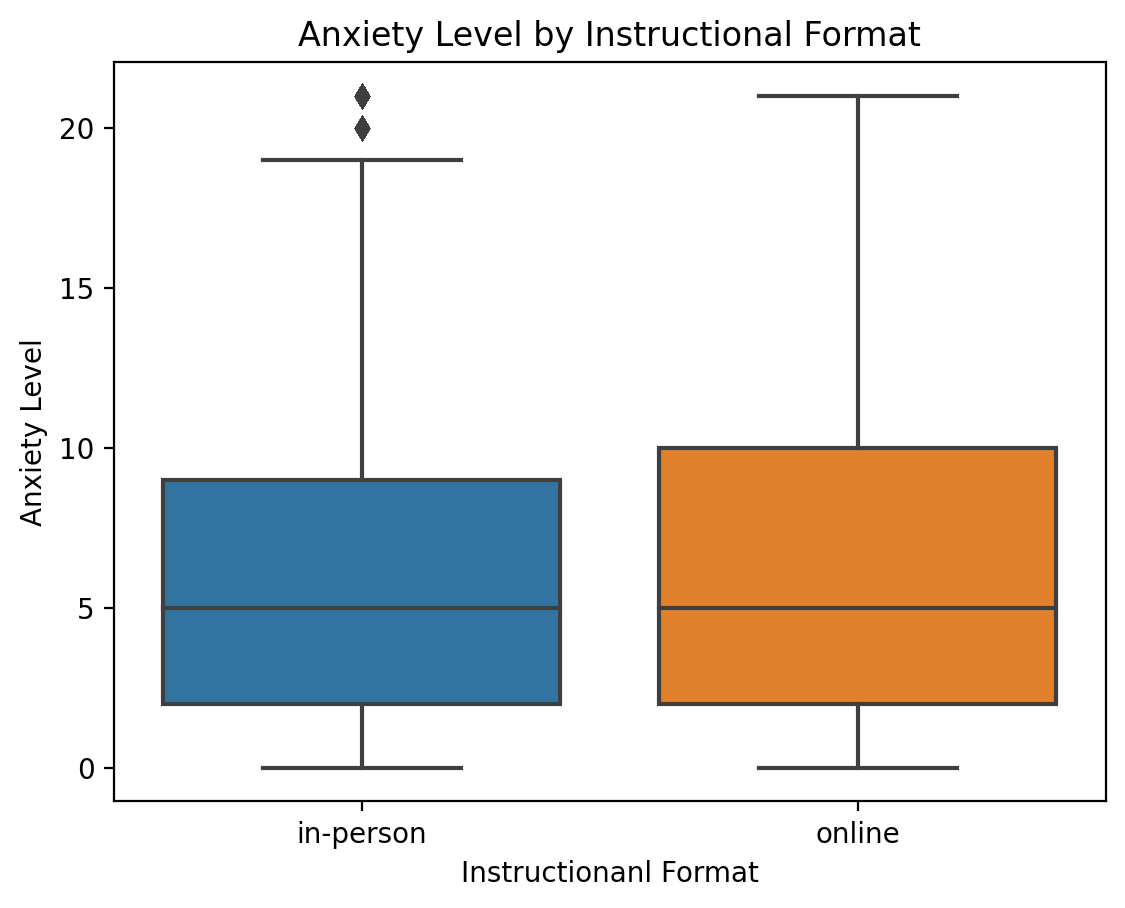

In [12]:
# anxiety and is_online 
sns.boxplot(x="is_online", y="anxiety", data=matched_data)
plt.xlabel("Instructionanl Format")
plt.ylabel ("Anxiety Level")
plt.xticks([0.0,1.0], ['in-person', 'online'])
plt.title("Anxiety Level by Instructional Format")
plt.show()

In [13]:
#t-test
stats.ttest_ind(matched_data[matched_data['is_online']==0]['anxiety'],
                matched_data[matched_data['is_online']==1]['anxiety'])

Ttest_indResult(statistic=-3.2444541549286865, pvalue=0.0011778055437280592)

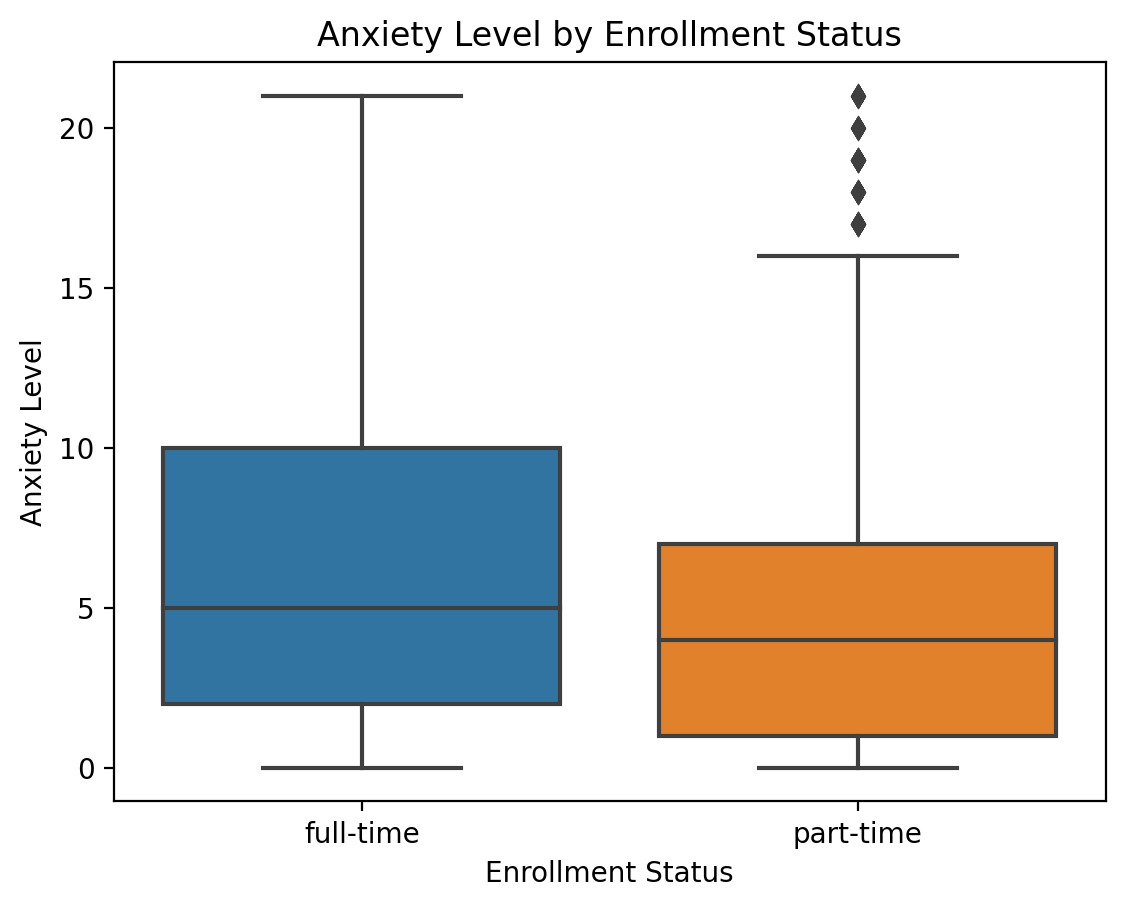

In [14]:
# anxiety and enrollment
sns.boxplot(x="enroll", y="anxiety", data=matched_data)
plt.xlabel("Enrollment Status")
plt.ylabel ("Anxiety Level")
plt.xticks([0.0,1.0], ['full-time', 'part-time'])
plt.title("Anxiety Level by Enrollment Status")
plt.show()

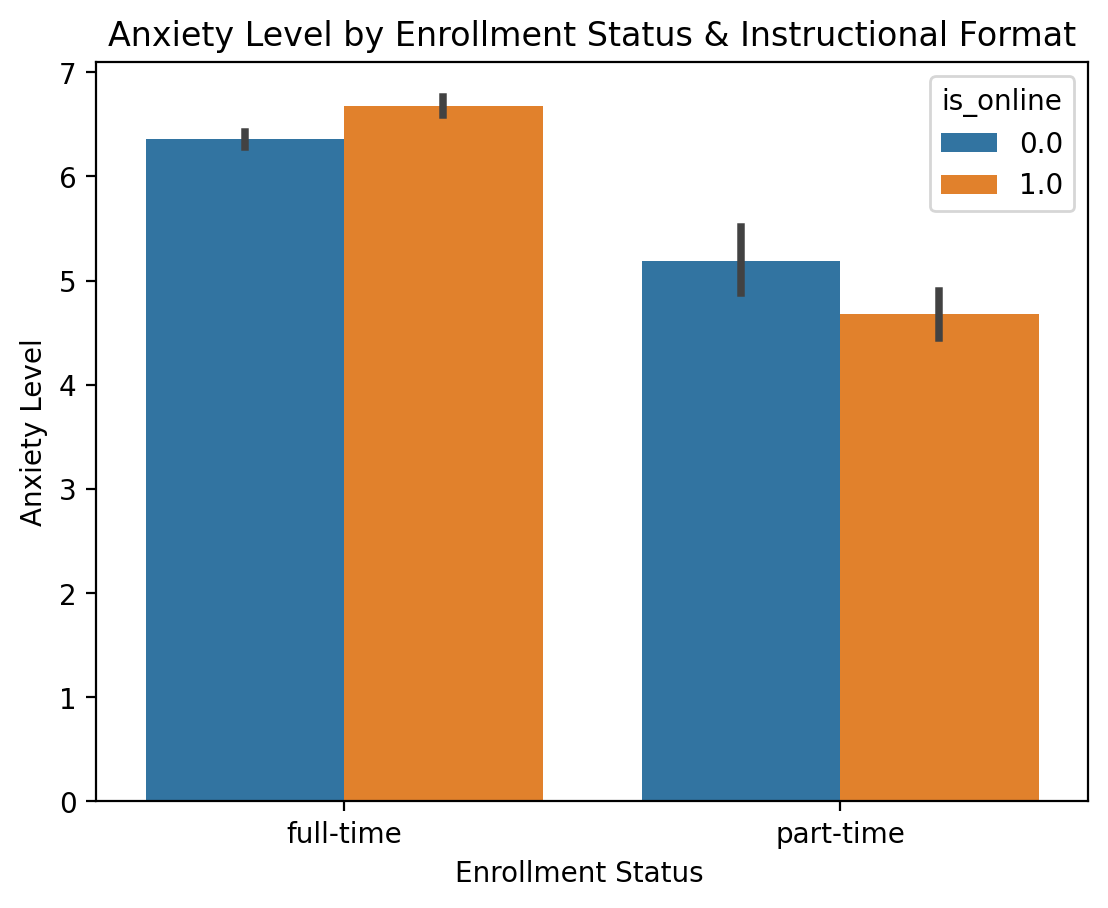

In [15]:
# anxiety and enrollment
sns.barplot(x="enroll", y="anxiety", hue = 'is_online',data=matched_data)
plt.xlabel("Enrollment Status   ")
plt.ylabel ("Anxiety Level")
plt.xticks([0.0,1.0], ['full-time', 'part-time'])
plt.title("Anxiety Level by Enrollment Status & Instructional Format")
plt.show()

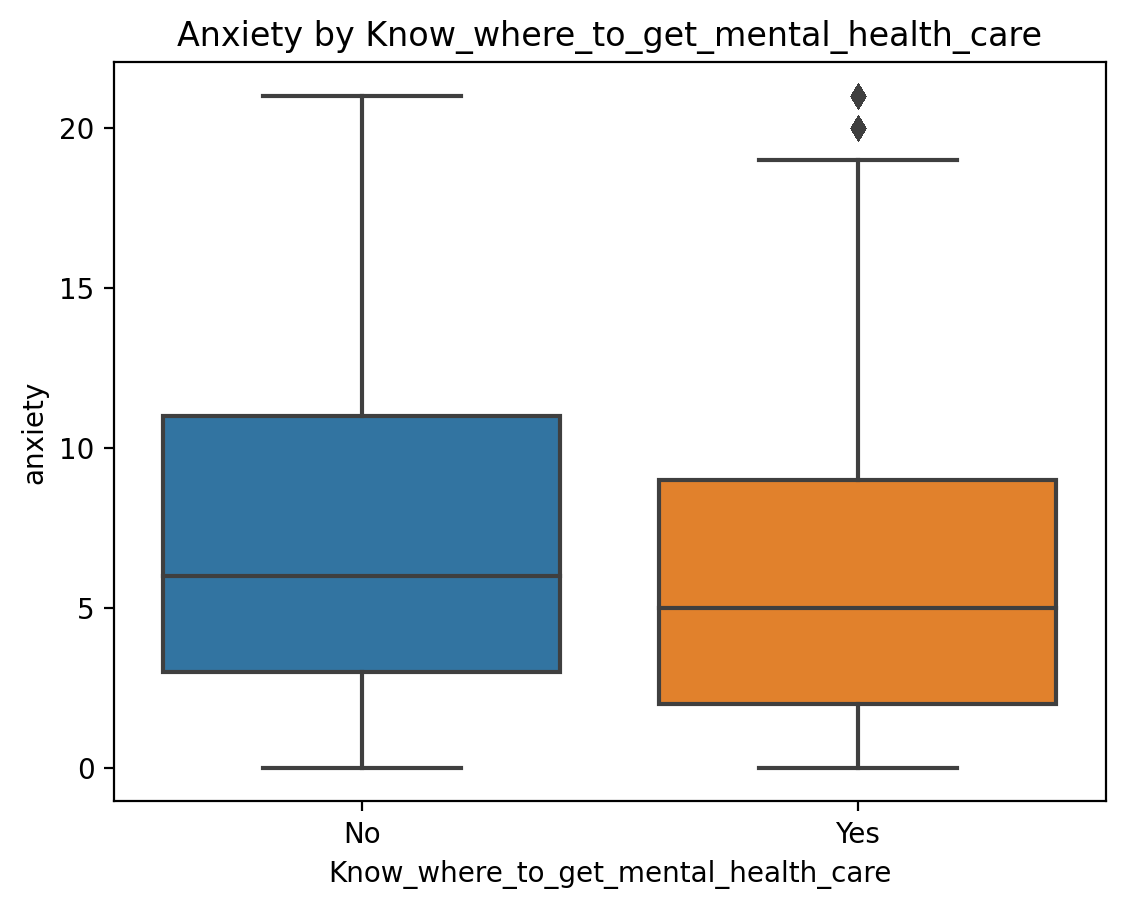

In [16]:
# anxiety and know where to get mental health care
sns.boxplot(x='knowwher', y="anxiety", data=matched_data)
plt.xlabel("Know_where_to_get_mental_health_care")
plt.xticks([0.0,1.0], ['No', 'Yes'])
plt.title("Anxiety by Know_where_to_get_mental_health_care")   
plt.show()

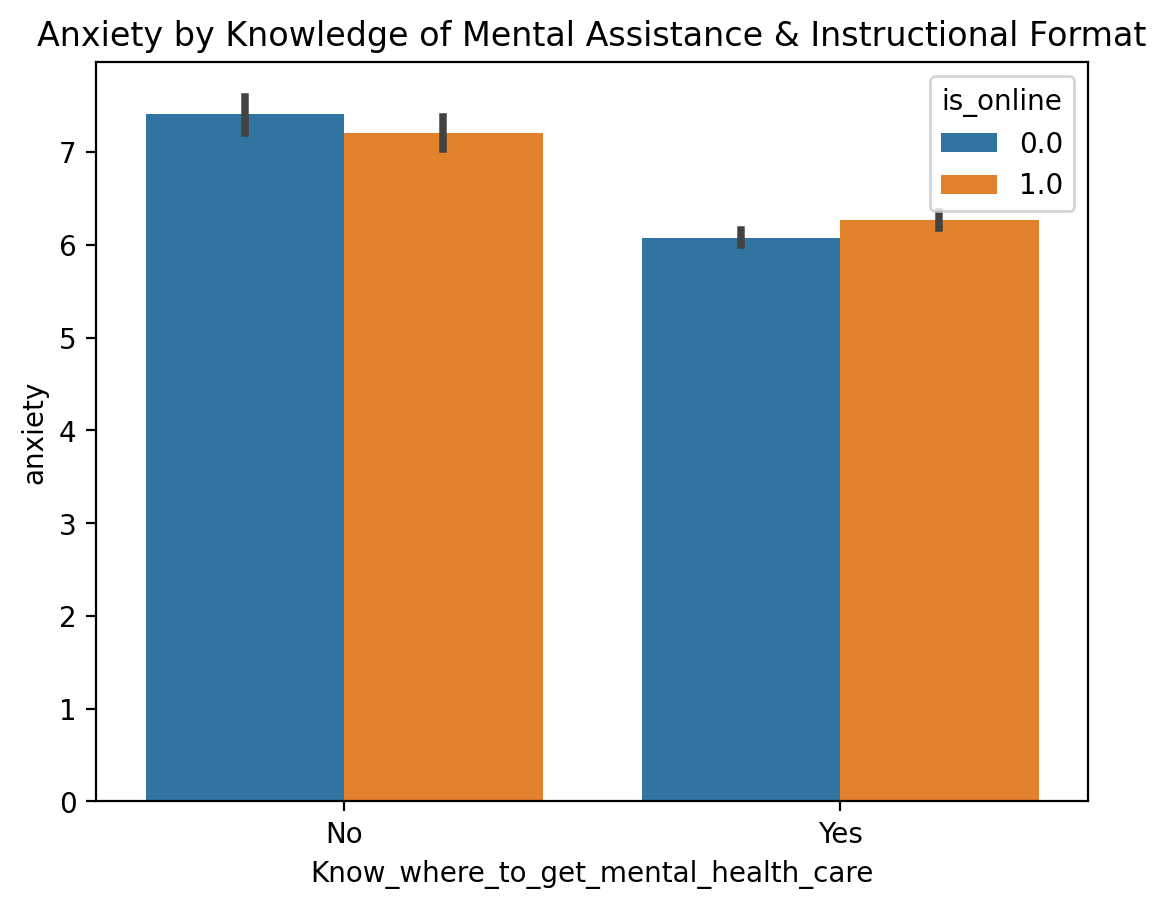

In [17]:
# bar plot anxiety and know where to get mental by is_online
sns.barplot(x='knowwher', y="anxiety", hue="is_online", data=matched_data)
plt.xlabel("Know_where_to_get_mental_health_care")
plt.xticks([0.0,1.0], ['No', 'Yes'])
plt.title("Anxiety by Knowledge of Mental Assistance & Instructional Format")
plt.show()

In [18]:
# t-test
stats.ttest_ind(matched_data[matched_data['knowwher']==0]['anxiety'], matched_data[matched_data['knowwher']==1]['anxiety'])

Ttest_indResult(statistic=16.767873662662257, pvalue=7.16597156781192e-63)

In [19]:
smf.wls("anxiety ~C(is_online)", matched_data, weights=matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.842
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0157
Time:                        21:56:33   Log-Likelihood:            -1.1738e+05
No. Observations:               36944   AIC:                         2.348e+05
Df Residuals:                   36942   BIC:                         2.348e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.6251      0.037    177.517      0.000       6.552       6.698
C(is_online)[T.1.0]    -0.1359      0.056     -2.417      0.016      -0.246      -0.026
==============================================================================
Omnibus:                     5204.104   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8225.669
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                       4.204   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# add other covariates but delete educ_par1 and educ_par2 since we made first_gen to represent both
smf.wls('anxiety ~ C(age)+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(scholarship_status_1)+C(children_dep)+C(hours_work_paid)'+
        '+C(transfer)+C(yr_sch)+C(persist)+C(disab_1)+C(disab_2)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+C(sub_cig)+C(sub_any)+C(exerc)+C(sleep_wknight)+C(dx_any)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(deport_worry)+C(fincur)+C(finpast)'+
        '+C(food_worry)+C(food_notlast)+C(first_gen)+C(is_online)+C(enroll)+C(knowwher)+C(cases_per_10k)', 
        data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.514
Model:                            WLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     318.9
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:56:35   Log-Likelihood:            -1.0407e+05
No. Observations:               36944   AIC:                         2.084e+05
Df Residuals:                   36821   BIC:                         2.094e+05
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          5.2766      0.424     12.456      0.000       4.446       6.107
C(age)[T.1]                       -0.0215      0.061     -0.351      0.726      -0.142       0.099
C(age)[T.2]                       -0.6036      0.084     -7.217      0.000      -0.768      -0.440
C(sex_birth)[T.2.0]               -0.5464      0.275     -1.989      0.047      -1.085      -0.008
C(international)[T.1.0]           -0.0080      0.083     -0.097      0.923      -0.170       0.154
C(scholarship_status_1)[T.1.0]     0.0209      0.044      0.471      0.637      -0.066       0.108
C(children_dep)[T.2.0]            -0.2146      0.087     -2.456      0.014      -0.386      -0.043
C(children_dep)[T.3.0]            -0.1242      0.091     -1.359      0.174      -0.303       0.055
C(children_dep)[T.4.0]            -0.3432      0.122     -2.817      0.005      -0.582      -0.104
C(children_dep)[T.5.0]            -0.1816      0.142     -1.275      0.202      -0.461       0.098
C(hours_work_paid)[T.1]           -0.0037      0.051     -0.073      0.942      -0.104       0.097
C(hours_work_paid)[T.2]            0.0883      0.057      1.556      0.120      -0.023       0.200
C(transfer)[T.1.0]                -0.0632      0.073     -0.869      0.385      -0.206       0.079
C(yr_sch)[T.2.0]                   0.2590      0.053      4.847      0.000       0.154       0.364
C(yr_sch)[T.3.0]                   0.2533      0.069      3.687      0.000       0.119       0.388
C(yr_sch)[T.4.0]                   0.2452      0.076      3.230      0.001       0.096       0.394
C(yr_sch)[T.5.0]                   0.0844      0.148      0.570      0.568      -0.206       0.375
C(yr_sch)[T.6.0]                   0.7238      0.289      2.505      0.012       0.157       1.290
C(yr_sch)[T.7.0]                  -0.0807      0.331     -0.244      0.807      -0.729       0.568
C(persist)[T.2.0]                  0.1818      0.047      3.902      0.000       0.090       0.273
C(persist)[T.3.0]                  0.3971      0.073      5.469      0.000       0.255       0.539
C(persist)[T.4.0]                  1.0355      0.279      3.707      0.000       0.488       1.583
C(persist)[T.5.0]                  0.4938      0.655      0.754      0.451      -0.790       1.777
C(persist)[T.6.0]                  1.7164      0.746      2.300      0.021       0.254       3.179
C(disab_1)[T.1.0]                  0.1038      0.196      0.529      0.597      -0.281       0.488
C(disab_1)[T.2.0]                  0.0605      0.109      0.557      0.577      -0.152       0.273
C(disab_1)[T.3.0]                 -0.0870      0.147     -0.593      0.553      -0.375       0.201
C(disab_2)[T.2.0]                 -0.1795      0.225     -0.797      0.425      -0.621       0.262
C(disab_2)[T.3

In [21]:
# add interaction terms: C(is_online)*C(enroll)
smf.wls('anxiety ~ C(age)+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(scholarship_status_1)+C(children_dep)+C(hours_work_paid)'+
        '+C(transfer)+C(yr_sch)+C(persist)+C(disab_1)+C(disab_2)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+C(sub_cig)+C(sub_any)+C(exerc)+C(sleep_wknight)+C(dx_any)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(deport_worry)+C(fincur)+C(finpast)'+
        '+C(food_worry)+C(food_notlast)+C(first_gen)+C(is_online)*C(enroll)+C(knowwher)+C(cases_per_10k)', 
        data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.514
Model:                            WLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     316.3
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:56:37   Log-Likelihood:            -1.0407e+05
No. Observations:               36944   AIC:                         2.084e+05
Df Residuals:                   36820   BIC:                         2.094e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                5.2641      0.424     12.421      0.000       4.433       6.095
C(age)[T.1]                             -0.0208      0.061     -0.339      0.734      -0.141       0.099
C(age)[T.2]                             -0.6031      0.084     -7.211      0.000      -0.767      -0.439
C(sex_birth)[T.2.0]                     -0.5445      0.275     -1.982      0.047      -1.083      -0.006
C(international)[T.1.0]                 -0.0077      0.083     -0.094      0.925      -0.169       0.154
C(scholarship_status_1)[T.1.0]           0.0211      0.044      0.478      0.633      -0.066       0.108
C(children_dep)[T.2.0]                  -0.2122      0.087     -2.427      0.015      -0.384      -0.041
C(children_dep)[T.3.0]                  -0.1223      0.091     -1.338      0.181      -0.301       0.057
C(children_dep)[T.4.0]                  -0.3420      0.122     -2.808      0.005      -0.581      -0.103
C(children_dep)[T.5.0]                  -0.1809      0.143     -1.270      0.204      -0.460       0.098
C(hours_work_paid)[T.1]                 -0.0046      0.051     -0.089      0.929      -0.105       0.096
C(hours_work_paid)[T.2]                  0.0878      0.057      1.547      0.122      -0.023       0.199
C(transfer)[T.1.0]                      -0.0644      0.073     -0.884      0.377      -0.207       0.078
C(yr_sch)[T.2.0]                         0.2574      0.053      4.814      0.000       0.153       0.362
C(yr_sch)[T.3.0]                         0.2523      0.069      3.673      0.000       0.118       0.387
C(yr_sch)[T.4.0]                         0.2434      0.076      3.205      0.001       0.095       0.392
C(yr_sch)[T.5.0]                         0.0821      0.148      0.555      0.579      -0.208       0.372
C(yr_sch)[T.6.0]                         0.7240      0.289      2.506      0.012       0.158       1.290
C(yr_sch)[T.7.0]                        -0.0886      0.331     -0.268      0.789      -0.737       0.560
C(persist)[T.2.0]                        0.1816      0.047      3.898      0.000       0.090       0.273
C(persist)[T.3.0]                        0.3969      0.073      5.466      0.000       0.255       0.539
C(persist)[T.4.0]                        1.0355      0.279      3.707      0.000       0.488       1.583
C(persist)[T.5.0]                        0.4928      0.655      0.753      0.452      -0.791       1.776
C(persist)[T.6.0]                        1.7170      0.746      2.301      0.021       0.254       3.180
C(disab_1)[T.1.0]                        0.1035      0.196      0.528      0.598      -0.281       0.488
C(disab_1)[T.2.0]                        0.0611      0.109      0.562      0.574      -0.152       0.274
C(disab_1)[T.3.0]                     

In [22]:
# add interaction term C(is_online)*C(knowwher)
smf.wls('anxiety ~ C(age)+C(sex_birth)+gender_male+gender_female+gender_transm+gender_transf+sexual_other'+
        '+gender_nonbin+gender_selfid+sexual_h+sexual_l+sexual_g+sexual_bi+sexual_queer+sexual_quest+sexual_asexual'+
        '+sexual_pan+race_black+race_ainaan+race_asian+race_his+race_pi+race_mides+race_white+race_other'+
        '+C(international)+ C(scholarship_status_1)+C(children_dep)+C(hours_work_paid)'+
        '+C(transfer)+C(yr_sch)+C(persist)+C(disab_1)+C(disab_2)+C(positive_mental_health)'+
        '+C(risk_of_depression)+C(timestud)+C(sui_idea)+C(lone_isolated)+C(abuse_life)+C(assault_emo)'+
        '+C(alc_any)+C(sub_cig)+C(sub_any)+C(exerc)+C(sleep_wknight)+C(dx_any)+C(meds_any)'+
        '+degree_ass+degree_bach+degree_ma+degree_jd+degree_md+degree_phd+degree_other+degree_nd'+
        '+gr_a+gr_b+gr_c+gr_d+gr_f+gr_none+gr_dk+C(satisfied_overall)+C(deport_worry)+C(fincur)+C(finpast)'+
        '+C(food_worry)+C(food_notlast)+C(first_gen)+C(is_online)*C(knowwher)+C(enroll)+C(cases_per_10k)', 
        data=matched_data, weights = matched_data['weights']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                anxiety   R-squared:                       0.514
Model:                            WLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     316.4
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:56:40   Log-Likelihood:            -1.0406e+05
No. Observations:               36944   AIC:                         2.084e+05
Df Residuals:                   36820   BIC:                         2.094e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  5.3877      0.426     12.656      0.000       4.553       6.222
C(age)[T.1]                               -0.0212      0.061     -0.345      0.730      -0.141       0.099
C(age)[T.2]                               -0.6047      0.084     -7.231      0.000      -0.769      -0.441
C(sex_birth)[T.2.0]                       -0.5483      0.275     -1.997      0.046      -1.087      -0.010
C(international)[T.1.0]                   -0.0094      0.083     -0.114      0.909      -0.171       0.152
C(scholarship_status_1)[T.1.0]             0.0200      0.044      0.451      0.652      -0.067       0.107
C(children_dep)[T.2.0]                    -0.2096      0.087     -2.398      0.016      -0.381      -0.038
C(children_dep)[T.3.0]                    -0.1262      0.091     -1.381      0.167      -0.305       0.053
C(children_dep)[T.4.0]                    -0.3425      0.122     -2.812      0.005      -0.581      -0.104
C(children_dep)[T.5.0]                    -0.1824      0.142     -1.280      0.201      -0.462       0.097
C(hours_work_paid)[T.1]                   -0.0047      0.051     -0.092      0.926      -0.105       0.096
C(hours_work_paid)[T.2]                    0.0879      0.057      1.549      0.121      -0.023       0.199
C(transfer)[T.1.0]                        -0.0638      0.073     -0.876      0.381      -0.206       0.079
C(yr_sch)[T.2.0]                           0.2595      0.053      4.855      0.000       0.155       0.364
C(yr_sch)[T.3.0]                           0.2532      0.069      3.686      0.000       0.119       0.388
C(yr_sch)[T.4.0]                           0.2452      0.076      3.231      0.001       0.096       0.394
C(yr_sch)[T.5.0]                           0.0839      0.148      0.567      0.571      -0.206       0.374
C(yr_sch)[T.6.0]                           0.7267      0.289      2.515      0.012       0.160       1.293
C(yr_sch)[T.7.0]                          -0.0856      0.331     -0.259      0.796      -0.734       0.563
C(persist)[T.2.0]                          0.1813      0.047      3.893      0.000       0.090       0.273
C(persist)[T.3.0]                          0.3926      0.073      5.405      0.000       0.250       0.535
C(persist)[T.4.0]                          1.0272      0.279      3.678      0.000       0.480       1.575
C(persist)[T.5.0]                          0.4828      0.655      0.737      0.461      -0.801       1.766
C(persist)[T.6.0]                          1.6924      0.746      2.268      0.023       0.230       3.155
C(disab_1)[T.1.0]                          0.1079      0.196      0.550      0.582      -0.277       0.492
C(disab_1)[T.2.0]                          0.0612      0.109      0.564      0.573     